# Parte 4: Estadística inferencial

Tiene como objetivo hacer inferencias sobre muestras generadas, para asi obtener informacion sobre sus correspondientes distribuciones. Se importar las funciones auxiliares que hemos implementado para simular las muestras de variables aleatorias:

In [136]:
import sys; sys.path.insert(0, '..')
from simulador import *
from math import *

A continuacion, se generaran dos muestras con distribucion normal con media igual a 100 y varianza igual a 5, pero una con 10 repeticiones y la otra con 30 repeticiones. La primera muestra con n = 10 esta representada en el siguiente histograma:

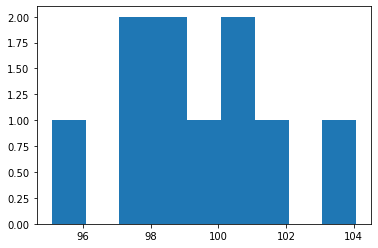

In [137]:
%matplotlib inline
from graficas import histograma
nor10 = normal(10, 100, sqrt(5))
histograma(nor10, [1])

La segunda muestra con n = 30 esta representada en el siguiente histograma:

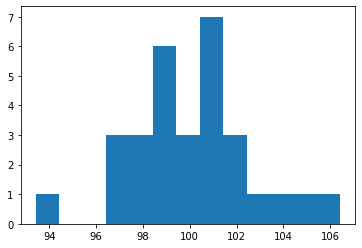

In [138]:
nor30 = normal(30, 100, sqrt(5))
histograma(nor30, [1])

Para las muestra con n = 10 y n = 30 respectivamente, se obtienen las estimaciones puntuales de sus medias y de sus varianzas. 

Como se vio a lo largo del curso la media muestral (o $\bar x$) es un estimador insesgado de la media por lo que es el estimador que utilizaremos.

La varianza muestral(o $s^2$) es un estimador insesgado de la varianza por lo que es el estimador que utilizaremos. Ya que el estimador debe recibir como input los datos de las muestras, tales estimaciones estan representadas en la siguiente tabla :

In [139]:
from IPython.display import display, Markdown
from analisis import media_muestral as mm
from analisis import varianza_muestral as vm
display(Markdown('''
| Tamaño    | Media estimada | Varianza estimada|
|-----------|--------------- |------------------|
| %d        | %.2f           | %.2f             |
| %d        | %.2f           | %.2f             |
''' % (10, mm(nor10), vm(nor10),
       30, mm(nor30), vm(nor30))))


| Tamaño    | Media estimada | Varianza estimada|
|-----------|--------------- |------------------|
| 10        | 99.36           | 5.41             |
| 30        | 100.01           | 6.32             |


Ahora, se pide que dado que se conoce el dato de que la distribucion tiene varianza 5, se obtengan intervalos de confianza del 95% y del 98% para la media estimada de ambas muestras. Utilizaremos la librería `scipy` para obtener los valores de la inversa de la función distribución para una una distribución normal estandar, es decir Z ~ N(0,1), correspondientes a un intervalo de confianza $1 - \alpha$, o lo que es lo mismo, el valor de $Z_{\alpha/2}$.

Para la primera muestra, el intervalo de 95% de confianza es:

In [140]:
from scipy.stats import norm
marg = lambda a, n : norm.ppf((1 - a)/2) * sqrt(5) / sqrt(n)
interv = lambda s, a : (mm(s) + marg(a, len(s)), mm(s) - marg(a, len(s)))
interv(nor10, .95)

(97.9711346260824, 100.74294227478177)

Para la misma muestra, obtenemos el intervalo de 98% de confianza para la media:

In [141]:
interv(nor10, .98)

(97.7120620932989, 101.00201480756527)

De la misma forma obtenemos los intervalos de confianza para la muestra de 30 datos con 95% de confianza: 

In [142]:
interv(nor30, .95)

(99.20858170831391, 100.80888560043235)

Y finalmente un intervalo del 98% de confianza para la muestra de 30 datos:

In [143]:
interv(nor30, .98)

(99.05900611177172, 100.95846119697454)

Como es posible observar ante la repetición de la experiencia, la gran mayoría de las veces, pero no todas, las medias de las distribuciones de base se encuentran en el intervalo de confianza inferido a partir de las muestras y la varianza conocida.

Ahora repetiremos la experienza pero utilizando la varianza muestral como estimador. Por ello redefiniremos nuestro método utilizando la distribución T de Student y calcularemos el intervalo de 95% de confianza para la muestra de diez datos de población normal con varianza desconocida:

In [144]:
from scipy.stats import t
marg2 = lambda a, s : t.ppf((1 - a)/2, len(s) - 1) * sqrt(vm(s)/len(s))
interv2 = lambda s, a : (mm(s) + marg2(a, s), mm(s) - marg2(a, s))
interv2(nor10, .95)

(97.69323182468034, 101.02084507618383)

El intervalo de 98% de confianza para la misma muestra será:

In [145]:
interv2(nor10, .98)

(97.28188328957371, 101.43219361129046)

Finalmente calcularemos los intervalos de confianza de la media, asumiendo una distribución normal con varianza desconocida, que se infieren a partir de la muestra de 30 datos. Primero con un 95% de confianza: 

In [146]:
interv2(nor30, .95)

(99.06963427474926, 100.947833033997)

Y con 98% de confianza:

In [147]:
interv2(nor30, .98)

(98.87825779762437, 101.13920951112189)

Así hemos verificado empíricamente que repitiendo la experiencia, los intervalos bajo la asunción de de una varianza conocida son menores (para el mismo porcentaje de confianza) que los obtenidos desconociéndola y reemplazándola por la varianza muestral.

A continuación probaremos si nuestras muestras nos permiten inferir que provienen de distribuciones normales cuya varianza sea mayor a algún valor dado. Para ello definimos una función auxiliar que calcula el límite inferior de un intervalo de confianza unilateral con la ayuda de la distribución Chi cuadrado.

In [148]:
from scipy.stats import chi2
lowbound = lambda s, p: ( len(s) - 1 ) * vm(s) / chi2.ppf(p, len(s) - 1)

Para probar a continuación con un 99% de confianza que la muestra de 30 datos proviene de una distribución normal cuya varianza es mayor a 5, su límite inferior unilateral debe ser entonces también mayor.

In [149]:
print(lowbound(nor30, .99))

3.6989854435135374


Finalmente terminaremos nuestro trabajo realizando una prueba de bondad de ajuste, para la cual también nuestro estimador se basará en la distribución Chi cuadrado.

Generaremos primero los límites de las clases para un anchos de banda de 0.5

In [150]:
from numpy import arange
gaps = arange(min(nor30), max(nor30), 0.5)
print(gaps)

[ 93.42722231  93.92722231  94.42722231  94.92722231  95.42722231
  95.92722231  96.42722231  96.92722231  97.42722231  97.92722231
  98.42722231  98.92722231  99.42722231  99.92722231 100.42722231
 100.92722231 101.42722231 101.92722231 102.42722231 102.92722231
 103.42722231 103.92722231 104.42722231 104.92722231 105.42722231]


Obtendremos ahora las frecuencias observadas para cada clase:

In [151]:
obs = [len([x for x in nor30 if x >= l and x < l + 0.5]) for l in gaps]
print(obs)

[1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 5, 3, 0, 4, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1]


Calcularemos entonces las frecuencias esperadas teniendo en cuenta que la muestra proviene de una distribución normal:

In [152]:
esp = [round((norm.cdf(x + 0.5, loc=100, scale=sqrt(5)) \
              - norm.cdf(x, loc=100, scale=sqrt(5))) \
                  * 30) for x in gaps]
print(esp)

[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0]


Para que la prueba de bondad de ajuste funcione, es condición que las clases tengan frecuencias mayores o iguales a 5, por lo que realizaremos una unificación de clases hasta que ambas series, observadas y esperadas, cumplan con lo requerido.

In [153]:
obs2 = []
esp2 = []
obsacm = 0
espacm = 0
for pos in range(len(obs)):
    obsacm += obs[pos]
    espacm += esp[pos]
    if obsacm >= 5 and espacm >= 5:
        obs2.append(obsacm)
        esp2.append(espacm)
        obsacm = 0
        espacm = 0
if obsacm or espacm:
    esp2[-1] += espacm
    obs2[-1] += obsacm
print(obs2)
print(esp2)

[5, 8, 7, 10]
[5, 6, 9, 9]


Ahora si podemos calcular nuestro estimador como la sumatoria de los errores cuadrados relativos:

In [154]:
squarerr = sum([(obs2[pos] - val)**2/val for pos, val in enumerate(esp2)])
print(squarerr)

1.2222222222222223


Finalmente, para rechazar con 99 por ciento de confianza la hipótesis de que nuestra muestra aleatoria proviene de una población con una distribución normal cuyos parámetros son los especificados, nuestro estimador debiera ser mayor al Chi cuadrado que corresponde a un alfa de 0.01 y los grados de libertad que se deducen de la unificación de las clases.

In [155]:
squarerr > chi2.ppf(.01, len(esp2) - 1)

True